In [1]:
import math
import numpy as np

class Grover:
    
    def __init__(self,i,k):
        n = 2**k 
        self.obs = self.make_observation_state(n,i)
        self.obs_r = self.make_observation_orthogonal(n,i)
        self.phi_0 = self.make_phi_0_state(n,i)
        self.theta = math.atan(math.sqrt(1/(n-1)))
        self.iter = round(math.pi/(4.0*self.theta))
        
        self.phi = self.phi_0[:]
        
    def make_observation_state(self,n,i):
        phi = np.zeros(n)
        phi[i] = 1.0
        return phi
    
    def make_phi_0_state(self,n,i):
        return self.normalize(np.ones(n))
    
    def make_observation_orthogonal(self,n,i):
        phi = np.ones(n)
        phi[i] = 0.0
        return self.normalize(phi)
        
    def normalize(self,v):
        return v/math.sqrt(np.dot(v,v))
    
    def coords(self):
        (x,y) = (np.dot(self.obs_r,self.phi),np.dot(self.obs,self.phi))
        assert math.isclose(x**2+y**2,1.0)
        return (x,y)

    def reflect(self,ax,v):
        r = 2.0*np.dot(ax,v)*ax-v
        assert math.isclose(np.dot(r,r),1.0)
        return r
    
    def measure(self):
        return np.dot(self.obs,self.phi)**2
    
    def angle(self):
        (x,y) = self.coords()
        return math.atan(y/x)
   
    def grover_step(self):
        self.phi = self.reflect(self.obs_r,self.phi)
        self.phi = self.reflect(self.phi_0,self.phi)
    
    def grover(self):
        self.phi = self.phi_0[:]
        assert math.isclose(self.angle(),self.theta)
        for iter in range (self.iter+1):
            print(f'{iter}:\tprobability {self.measure():.3f}, angle: {(self.angle()/math.pi):.3f} Pi')
            self.grover_step()

k = 6
j = 3
Grover(j,k).grover()

"""
for k: 6, j: 3
0:	probability 0.016, angle: 0.040 Pi
1:	probability 0.135, angle: 0.120 Pi
2:	probability 0.344, angle: 0.199 Pi
3:	probability 0.591, angle: 0.279 Pi
4:	probability 0.816, angle: 0.359 Pi
5:	probability 0.964, angle: 0.439 Pi
6:	probability 0.997, angle: -0.481 Pi

"""

True

0:	probability 0.016, angle: 0.040 Pi
1:	probability 0.135, angle: 0.120 Pi
2:	probability 0.344, angle: 0.199 Pi
3:	probability 0.591, angle: 0.279 Pi
4:	probability 0.816, angle: 0.359 Pi
5:	probability 0.964, angle: 0.439 Pi
6:	probability 0.997, angle: -0.481 Pi


True

0:	(0.999,0.044)
1:	(0.991,0.132)
2:	(0.976,0.219)
3:	(0.952,0.305)
4:	(0.922,0.387)
5:	(0.884,0.467)
6:	(0.839,0.544)
7:	(0.788,0.616)
8:	(0.731,0.683)
9:	(0.667,0.745)
10:	(0.599,0.801)
11:	(0.526,0.850)
12:	(0.449,0.894)
13:	(0.368,0.930)
14:	(0.285,0.959)
15:	(0.199,0.980)
16:	(0.112,0.994)
17:	(0.023,1.000)
18:	(-0.065,0.998)


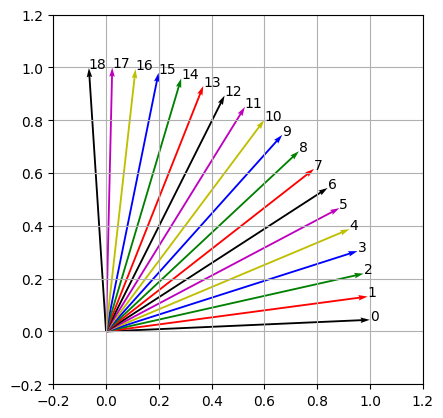

In [2]:
import matplotlib.pyplot as plt

def plot_grover(g):

    colors_of = ['k','r','g','b','y','m']
    plt.xlim(-.2, 1.2)
    plt.ylim(-.2, 1.2)
    plt.grid()
    axes = plt.gca()
    axes.set_aspect(1.0)

    for i in range(g.iter+1):
        x, y = g.coords()
        plt.quiver([0],[0],[x],[y],color=colors_of[i%len(colors_of)], angles='xy', 
                   scale_units='xy', scale=1, width=.005)
        plt.text(x,y,i)
        print(f'{i}:\t({x:.3f},{y:.3f})')
        g.grover_step()
        
    plt.show()

j = 3
k = 9
plot_grover(Grover(j,k))